# Introduction

The COVID-19 pandemic has altered much in the daily lives of millions of people.  News reports have reported people leaving high density metro areas for suburbs and rural areas.  This project seeks to identify changes in housing market data since March 2020 and investigates correlations with covid prevalence.

This project relies on data from the New York Times' COVID data set and the Federal Housing Finance Agency (FHFA) as our reliable data sources.



**Housing Market Level Changes**

The FHFA reports a Housing Price Index (HPI) for every state and most metropolitan areas in the US every quarter.  Additionally, they report an HPI for the non-metro area for each state. 

To begin our analysis of the housing market, we need a good measure of change in the index for each reported area over the time since the start of the COVID pandemic.  Since our housing data is quarterly, and policy interventions began in mid-March 2020 we will look at changes in the housing market from Q2 2020 to the most recent data in the data set.

In [48]:
import housing
import numpy as np
import matplotlib.pyplot as plt

o = housing.HousingData()
state_change = housing.yoy_change(o.state_data, 2020)
msa_change = housing.yoy_change(o.metro_data, 2020)


2021-03-03 18:11:10,193 - root - INFO - Data file found in directory


In [53]:
import csv
file = 'state_fips_codes.txt'
dic={}
with open(file) as f:
    reader = csv.reader(f, delimiter = "|")
    next(reader, None)
    for line in reader:
        key = line[1]
        value = line[0]
        dic[key] = int(value)

for record in state_change:
    st = record[1]
    a = dic.get(st)
    record[1]=a
    yq = record[2]+0.25*(record[3]-1)
    record.append(yq)
for record in msa_change:
    yq = record[2]+0.25*(record[3]-1)
    record.append(yq)
    if type(record[1])==str:
        st = record[1]
        a = dic.get(st)
        record[1]=a
print(msa_change)

[['Abilene, TX', None, 2020, 1, 233.73, 15.530000000000001, 7.1173235563703035, 2020.0, 2020.0, 2020.0], ['Abilene, TX', None, 2020, 2, 235.6, 7.609999999999985, 3.3378656958638473, 2020.25, 2020.25, 2020.25], ['Abilene, TX', None, 2020, 3, 240.5, 11.379999999999995, 4.9668296089385455, 2020.5, 2020.5, 2020.5], ['Abilene, TX', None, 2020, 4, 243.44, 12.620000000000005, 5.467463824625251, 2020.75, 2020.75, 2020.75], ['Akron, OH', None, 2020, 1, 167.77, 8.650000000000006, 5.4361488185017635, 2020.0, 2020.0, 2020.0], ['Akron, OH', None, 2020, 2, 169.85, 6.6200000000000045, 4.055627029345099, 2020.25, 2020.25, 2020.25], ['Akron, OH', None, 2020, 3, 173.7, 9.280000000000001, 5.6440822284393635, 2020.5, 2020.5, 2020.5], ['Akron, OH', None, 2020, 4, 178.48, 11.560000000000002, 6.9254732806134705, 2020.75, 2020.75, 2020.75], ['Albany, GA', None, 2020, 1, 161.35, 4.019999999999982, 2.5551388800610066, 2020.0, 2020.0, 2020.0], ['Albany, GA', None, 2020, 2, 164.29, 4.819999999999993, 3.0225120712

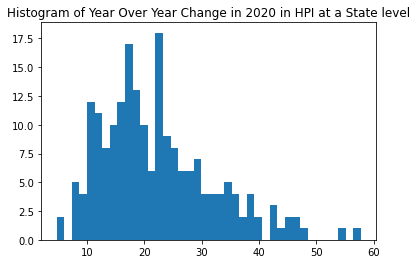

In [50]:
d_ch = []
for i in state_change:
    d_ch.append(i[5])

d = d_ch
plt.hist(d, bins =40)
plt.title("Histogram of Year Over Year Change in 2020 in HPI at a State level")


plt.show()


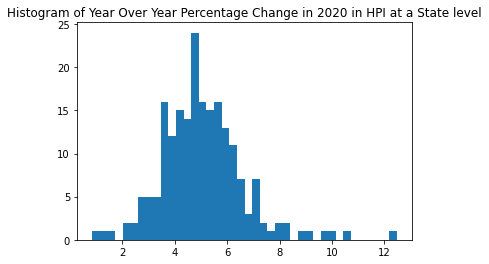

In [6]:
p_ch = []
for i in state_change:
    p_ch.append(i[6])

p = p_ch
plt.hist(p, bins =40)
plt.title("Histogram of Year Over Year Percentage Change in 2020 in HPI at a State level")


plt.show()

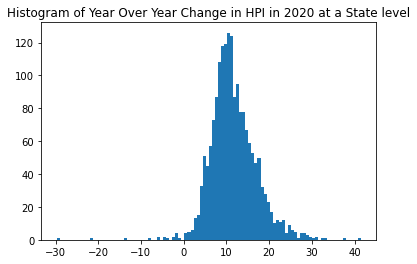

In [7]:
md_ch=[]
for i in msa_change:
    md_ch.append(i[5])

md = md_ch
plt.hist(md, bins =100)
plt.title("Histogram of Year Over Year Change in HPI in 2020 at a State level")


plt.show()

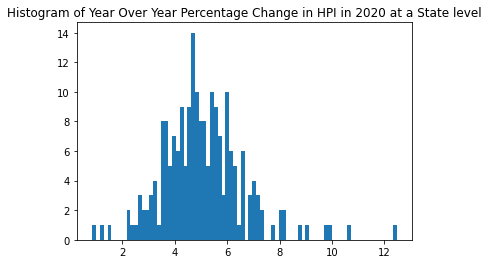

In [8]:
mp_ch = []
for i in msa_change:
    mp_ch.append(i[6])

mp = mp_ch
plt.hist(p, bins =80)
plt.title("Histogram of Year Over Year Percentage Change in HPI in 2020 at a State level")


plt.show()

In [47]:
import csv
import pandas as pd
#import metro level data
mfile = 'metro_year_over_year_change.csv'
metro=[]
with open(mfile) as f:
    reader = csv.reader(f)
    next(reader, None)
    for line in reader:
        metro.append(line)
#make a data frame of the data
#df_m = pd.DataFrame(metro)
#import state level data
sfile = 'state_year_over_year_change.csv'
state = []
with open(sfile) as f:
    reader = csv.reader(f)
    next(reader, None)
    for line in reader:
        state.append(line)
#make a dataframe of the data
#df_s = pd.DataFrame(state)
#df_m.columns = ['Place_Name', 'Place_ID', 'Year', 'Quarter', 'HPI', 'YoY_change', '%_YoY_change', 'year_quarter']
#df_s.columns = ['Place_Name', 'Place_ID', 'Year', 'Quarter', 'HPI', 'YoY_change', '%_YoY_change', 'year_quarter']

print(state)

[['Alaska', '2', '2020', '1', '340.53', '11.739999999999952', '3.5706682076705345', '2020.0'], ['Alaska', '2', '2020', '2', '344.14', '9.879999999999995', '2.9557829234727446', '2020.25'], ['Alaska', '2', '2020', '3', '349.61', '12.350000000000023', '3.6618632509043536', '2020.5'], ['Alaska', '2', '2020', '4', '351.98', '15.390000000000043', '4.572328352000963', '2020.75'], ['Alabama', '1', '2020', '1', '343.97', '17.900000000000034', '5.489618793510607', '2020.0'], ['Alabama', '1', '2020', '2', '348.61', '17.560000000000002', '5.304334692644616', '2020.25'], ['Alabama', '1', '2020', '3', '355.48', '20.03000000000003', '5.971083619019237', '2020.5'], ['Alabama', '1', '2020', '4', '362.16', '22.610000000000014', '6.6588131350316635', '2020.75'], ['Arkansas', '5', '2020', '1', '300.61', '12.840000000000032', '4.461896653577521', '2020.0'], ['Arkansas', '5', '2020', '2', '302.14', '10.449999999999989', '3.5825705372141616', '2020.25'], ['Arkansas', '5', '2020', '3', '307.29', '12.01000000

In [45]:
for row in df


Empty DataFrame
Columns: [Place_Name, Place_ID, Year, Quarter, HPI, YoY_change, %_YoY_change, year_quarter]
Index: []
